This file is used for data explorations:
    - looked into the data and data fields, 
    - tried to understand data size, contents, inconsistensies,and the underlying distributions.
    - where applicable, shown ways for tackling missing values and adjusting values. These are to create a training file that will later be used for building an optimal data model.

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#color = sns.color_palette()
pylab.rcParams['figure.figsize'] = (10, 4)

Populating the interactive namespace from numpy and matplotlib


In [2]:
path = '/Users/nargispauran/Desktop/Santander/'
train_data = path+'train_ver2.csv'
test_data = path+'test_ver2.csv'

In [7]:
train = pd.read_csv(train_data,nrows = 10000)

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 48 columns):
fecha_dato               10000 non-null object
ncodpers                 10000 non-null int64
ind_empleado             9950 non-null object
pais_residencia          9950 non-null object
sexo                     9950 non-null object
age                      10000 non-null object
fecha_alta               9950 non-null object
ind_nuevo                9950 non-null float64
antiguedad               10000 non-null object
indrel                   9950 non-null float64
ult_fec_cli_1t           12 non-null object
indrel_1mes              9950 non-null float64
tiprel_1mes              9950 non-null object
indresi                  9950 non-null object
indext                   9950 non-null object
conyuemp                 0 non-null float64
canal_entrada            9950 non-null object
indfall                  9950 non-null object
tipodom                  9950 non-null float64
cod_prov       

In [33]:
train.iloc[:,0:24].head(2)             # select the 2nd to the 4th column

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,indext,conyuemp,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO


In [28]:
train.iloc[:,24:].head(2)  

,ind_ahor_fin_ult1,ind_aval_fin_ult1,ind_cco_fin_ult1,ind_cder_fin_ult1,ind_cno_fin_ult1,ind_ctju_fin_ult1,ind_ctma_fin_ult1,ind_ctop_fin_ult1,ind_ctpp_fin_ult1,ind_deco_fin_ult1,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0.0,0


# Data Exploration

In [34]:
train = pd.read_csv(train_data,usecols=['ncodpers'])
test = pd.read_csv(test_data,usecols=['ncodpers'])

In [35]:
print("Number of rows in train : ", train.shape[0])
print("Number of rows in test : ", test.shape[0])
print("Number of customers in train : ", len(train['ncodpers'].unique()))
print("Number of customers in test : ", len(test['ncodpers'].unique()))
print("Number of common customers : ", len(set(train['ncodpers'].unique()).intersection(set(test['ncodpers'].unique()))))

Number of rows in train :  13647309
Number of rows in test :  929615
Number of customers in train :  956645
Number of customers in test :  929615
Number of common customers :  929615


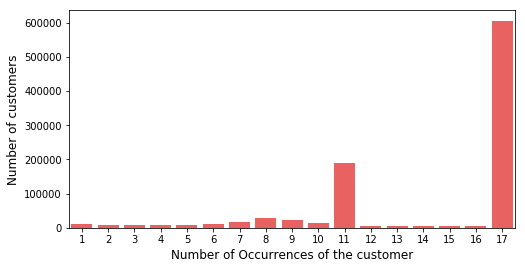

In [55]:
num_occur = train.groupby('ncodpers').agg('size').value_counts()

plt.figure(figsize=(8,4))
sns.barplot(num_occur.index, num_occur.values, alpha=0.7, color='red')
plt.xlabel('Number of Occurrences of the customer', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.show()

In [54]:
605464/num_occur.sum()

0.6329035326584052

total number of customers in the train data file = 956645
63% of the customers appear for all 17 months

# Date Columns

In [61]:
train = pd.read_csv(train_data, usecols=['fecha_dato', 'fecha_alta'], parse_dates=['fecha_dato', 'fecha_alta'])

In [65]:
train['fecha_dato'] = pd.to_datetime(train['fecha_dato'],format="%Y-%m-%d")
train['fecha_alta'] = pd.to_datetime(train['fecha_alta'],format="%Y-%m-%d")

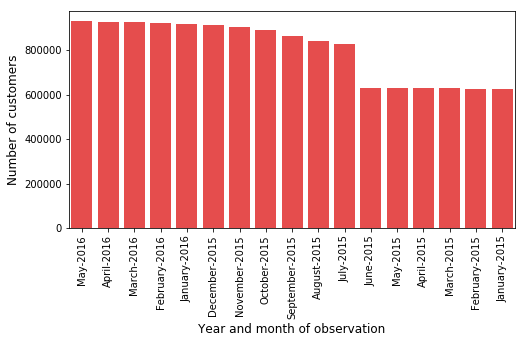

In [75]:
train['fecha_dato_yearmonth'] = train['fecha_dato'].apply(lambda x: x.strftime('%B-%Y'))     

yearmonth = train['fecha_dato_yearmonth'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(yearmonth.index, yearmonth.values, alpha=0.8, color='red')
plt.xlabel('Year and month of observation', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Findings : The number of observations for customers remained almost the same for the first 6 months. After that there is a gradual increase in that over the next 11 months

In [76]:
train['fecha_alta'].isnull().sum()

27734

In [77]:
train['fecha_alta'].describe()

count                13619575
unique                   6756
top       2014-07-28 00:00:00
freq                    57389
first     1995-01-16 00:00:00
last      2016-05-31 00:00:00
Name: fecha_alta, dtype: object

In [79]:
dates=train.loc[:,"fecha_alta"].sort_values().reset_index()
median_date = int(np.median(dates.index.values))
train.loc[train.fecha_alta.isnull(),"fecha_alta"] = dates.loc[median_date,"fecha_alta"]

Minimum value of fetcha_alta :  199501
Maximum value of fetcha_alta :  201605


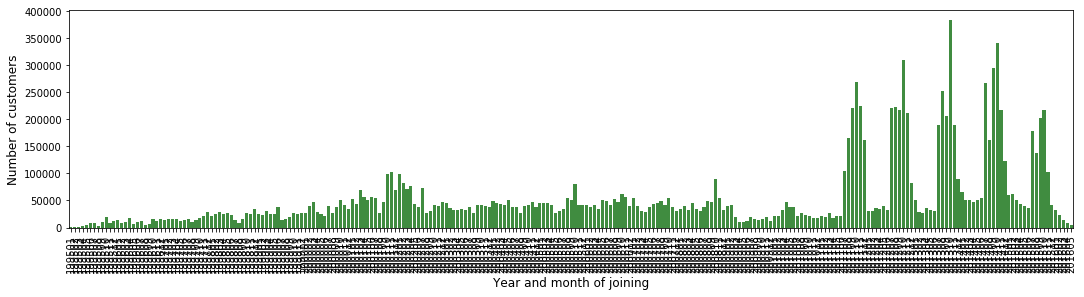

In [82]:
train['fecha_alta_yearmonth'] = train['fecha_alta'].apply(lambda x: (100*x.year) + x.month)
yearmonth = train['fecha_alta_yearmonth'].value_counts()

/Users/nargispauran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


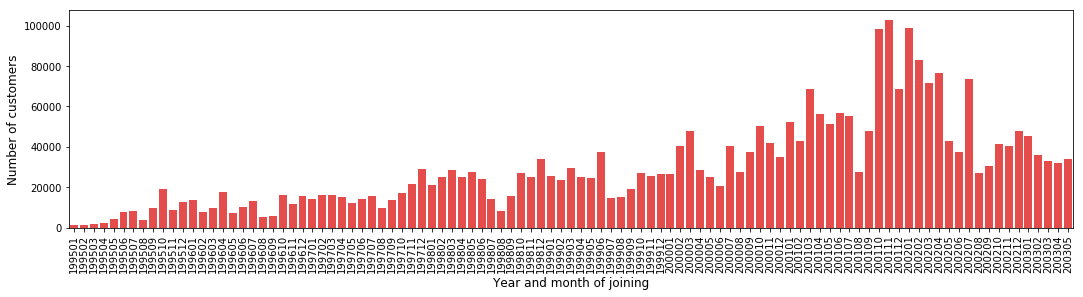

In [96]:
year_month = yearmonth.sort_index().reset_index()
year_month = year_month.ix[:100]
year_month.columns = ['yearmonth', 'number_of_customers']
plt.figure(figsize=(18,4))
sns.barplot(year_month.yearmonth.astype('int'), year_month.number_of_customers, alpha=0.8, color= 'red')
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

/Users/nargispauran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


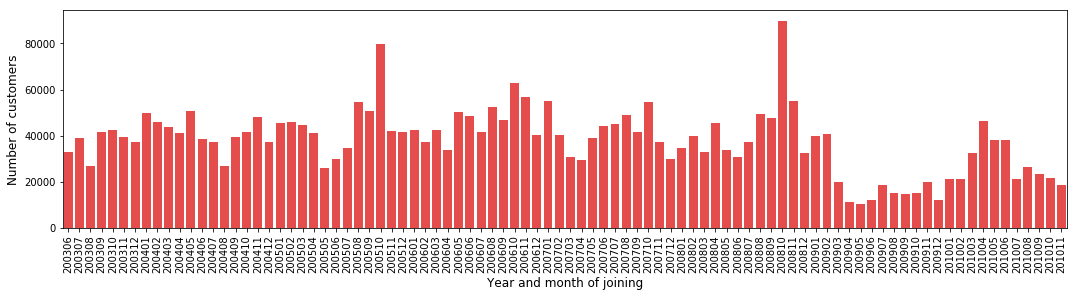

In [97]:
year_month = yearmonth.sort_index().reset_index()
year_month = year_month.ix[101:190]
year_month.columns = ['yearmonth', 'number_of_customers']
plt.figure(figsize=(18,4))
sns.barplot(year_month.yearmonth.astype('int'), year_month.number_of_customers, alpha=0.8, color= 'red')
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

/Users/nargispauran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


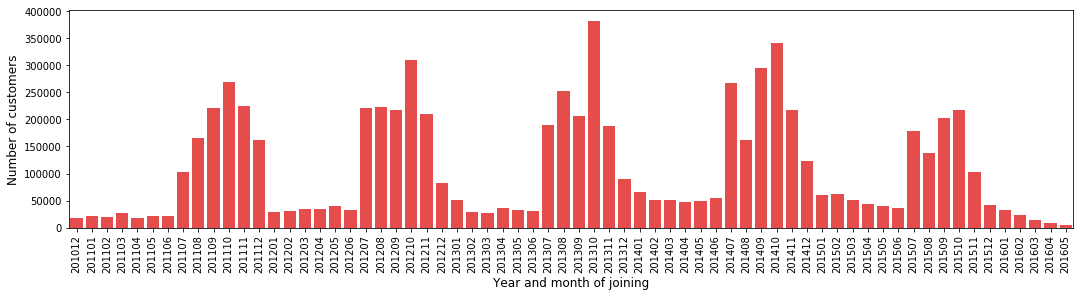

In [98]:
year_month = yearmonth.sort_index().reset_index()
year_month = year_month.ix[191:]
year_month.columns = ['yearmonth', 'number_of_customers']
plt.figure(figsize=(18,4))
sns.barplot(year_month.yearmonth.astype('int'), year_month.number_of_customers, alpha=0.8, color= 'red')
plt.xlabel('Year and month of joining', fontsize=12)
plt.ylabel('Number of customers', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

Findings

- The earliest date for a customer to hold a contract was in January 1995. 
- An incresed number of customers are becoming the first holder of contracts in the rcent years. 
- Customers seem to be engaging more/buying more during the second half of each year since 2011.


# Exploring Categorical Data

Number of missing values in  ind_empleado  :  10782
Number of unique values in  ind_empleado  :  6
Index(['N', -99, 'B', 'A', 'F', 'S'], dtype='object')


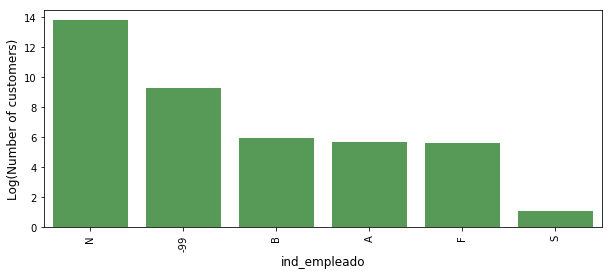


Number of missing values in  pais_residencia  :  10782
Number of unique values in  pais_residencia  :  114
Index(['ES',  -99, 'FR', 'AR', 'DE', 'GB', 'US', 'CO', 'RO', 'IT',
       ...
       'GI', 'HU', 'KW', 'CD', 'ML', 'KH', 'LV', 'BZ', 'GM', 'AL'],
      dtype='object', length=114)


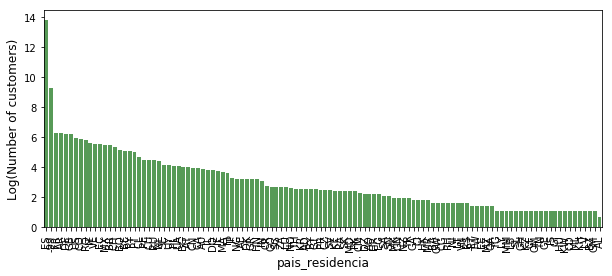


Number of missing values in  sexo  :  10786
Number of unique values in  sexo  :  3
Index(['V', 'H', -99], dtype='object')


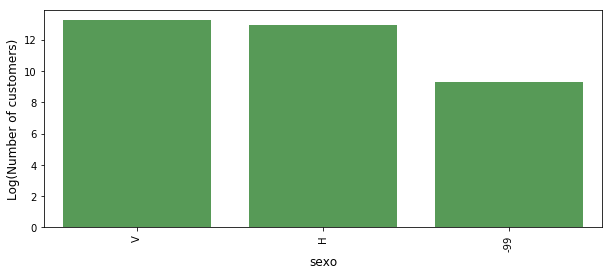


Number of missing values in  ind_nuevo  :  10782
Number of unique values in  ind_nuevo  :  3
Float64Index([0.0, -99.0, 1.0], dtype='float64')


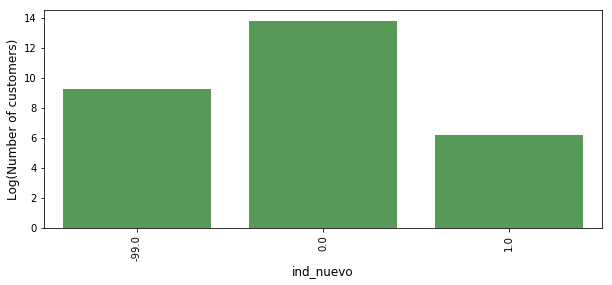


Number of missing values in  indrel  :  10782
Number of unique values in  indrel  :  3
Float64Index([1.0, -99.0, 99.0], dtype='float64')


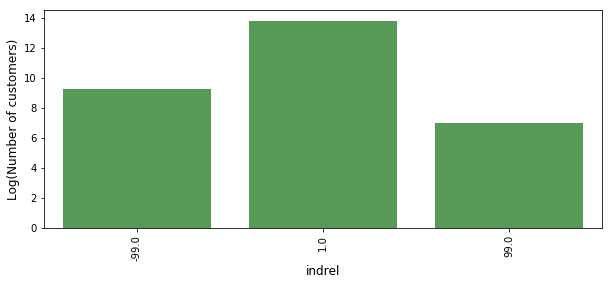


Number of missing values in  ult_fec_cli_1t  :  998899
Number of unique values in  ult_fec_cli_1t  :  23
Index([         -99, '2015-07-01', '2015-07-09', '2015-07-06', '2015-07-21',
       '2015-07-07', '2015-07-17', '2015-07-28', '2015-07-10', '2015-07-24',
       '2015-07-15', '2015-07-20', '2015-07-22', '2015-07-03', '2015-07-13',
       '2015-07-29', '2015-07-23', '2015-07-14', '2015-07-30', '2015-07-27',
       '2015-07-08', '2015-07-02', '2015-07-16'],
      dtype='object')


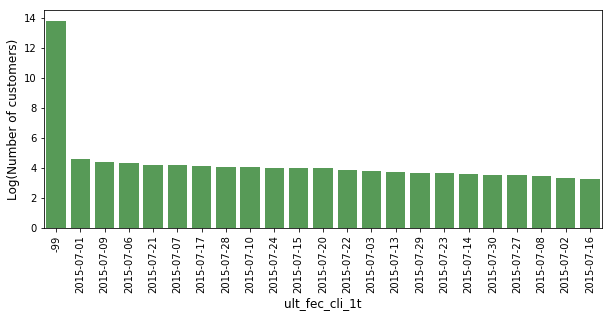


Number of missing values in  indrel_1mes  :  10782
Number of unique values in  indrel_1mes  :  4
Float64Index([1.0, -99.0, 3.0, 2.0], dtype='float64')


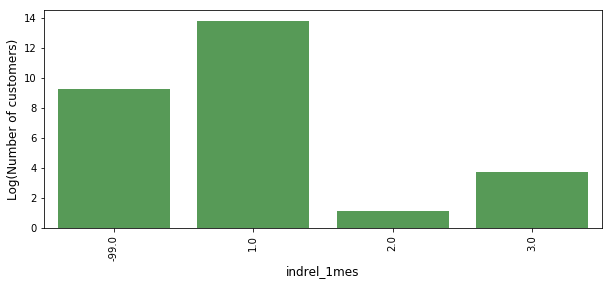


Number of missing values in  tiprel_1mes  :  10782
Number of unique values in  tiprel_1mes  :  4
Index(['A', 'I', -99, 'P'], dtype='object')


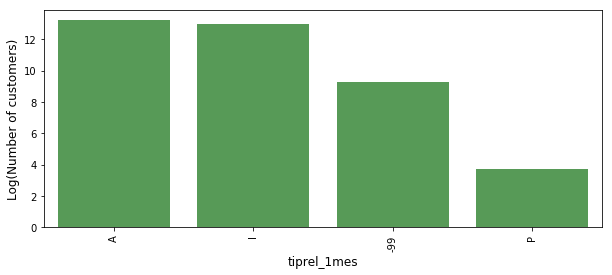


Number of missing values in  indresi  :  10782
Number of unique values in  indresi  :  3
Index(['S', -99, 'N'], dtype='object')


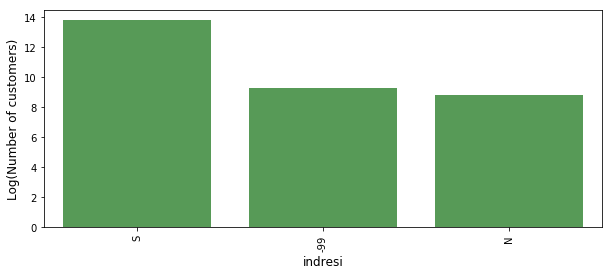


Number of missing values in  indext  :  10782
Number of unique values in  indext  :  3
Index(['N', 'S', -99], dtype='object')


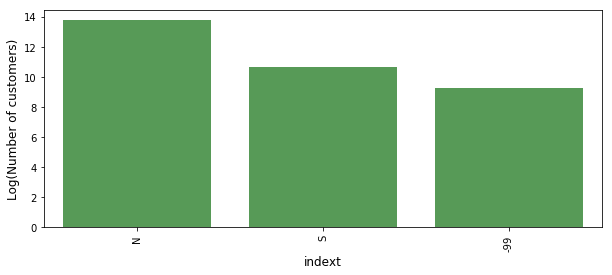

/Users/nargispauran/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Number of missing values in  conyuemp  :  999822
Number of unique values in  conyuemp  :  3
Index([-99, 'N', 'S'], dtype='object')


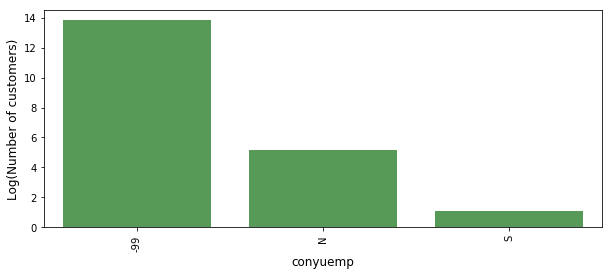


Number of missing values in  canal_entrada  :  10861
Number of unique values in  canal_entrada  :  157
Index(['KAT', 'KFC', 'KHE', 'KFA',   -99, 'KAS', 'KAG', 'KAA', 'KAY', 'KAB',
       ...
       'KFV', 'KHA', 'KHO', 'KDI', 'KBN', 'KGU', 'KDB', 'KCT', 'KGN', 'KGC'],
      dtype='object', length=157)


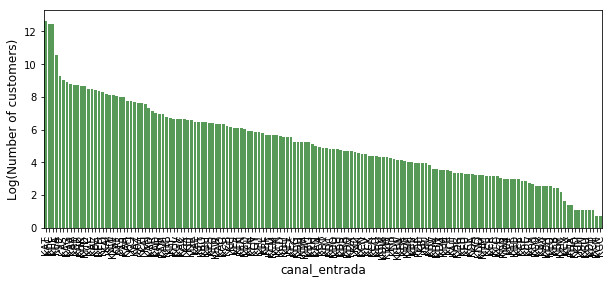


Number of missing values in  indfall  :  10782
Number of unique values in  indfall  :  3
Index(['N', -99, 'S'], dtype='object')


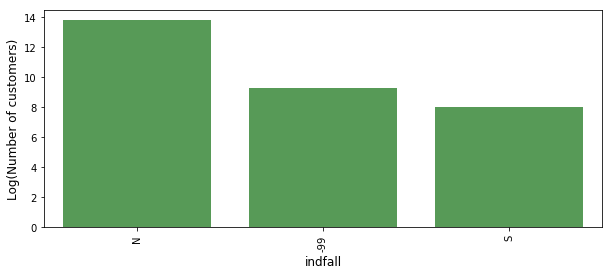


Number of missing values in  tipodom  :  10782
Number of unique values in  tipodom  :  2
Float64Index([1.0, -99.0], dtype='float64')


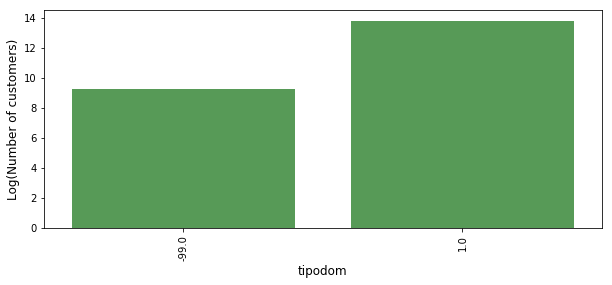


Number of missing values in  cod_prov  :  17734
Number of unique values in  cod_prov  :  53
Float64Index([ 28.0,   8.0,  46.0,  41.0,  15.0,  29.0,  30.0,  50.0,   3.0,
               11.0,  33.0, -99.0,  36.0,  47.0,  35.0,  48.0,  18.0,  45.0,
                6.0,  39.0,  37.0,  14.0,   7.0,  10.0,  21.0,  13.0,   2.0,
               12.0,  31.0,   9.0,  43.0,  26.0,  24.0,  17.0,  20.0,  27.0,
               32.0,  38.0,  25.0,  23.0,  19.0,   4.0,  16.0,  34.0,  49.0,
               40.0,   1.0,  22.0,   5.0,  44.0,  42.0,  52.0,  51.0],
             dtype='float64')


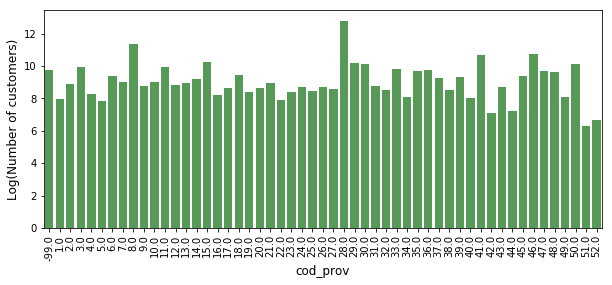


Number of missing values in  nomprov  :  17734
Number of unique values in  nomprov  :  53
Index([                'MADRID',              'BARCELONA',
                     'VALENCIA',                'SEVILLA',
                    'CORUÑA, A',                 'MALAGA',
                       'MURCIA',               'ZARAGOZA',
                     'ALICANTE',                  'CADIZ',
                     'ASTURIAS',                      -99,
                   'PONTEVEDRA',             'VALLADOLID',
                  'PALMAS, LAS',                'BIZKAIA',
                      'GRANADA',                 'TOLEDO',
                      'BADAJOZ',              'CANTABRIA',
                    'SALAMANCA',                'CORDOBA',
               'BALEARS, ILLES',                'CACERES',
                       'HUELVA',            'CIUDAD REAL',
                     'ALBACETE',              'CASTELLON',
                      'NAVARRA',                 'BURGOS',
                    'TAR

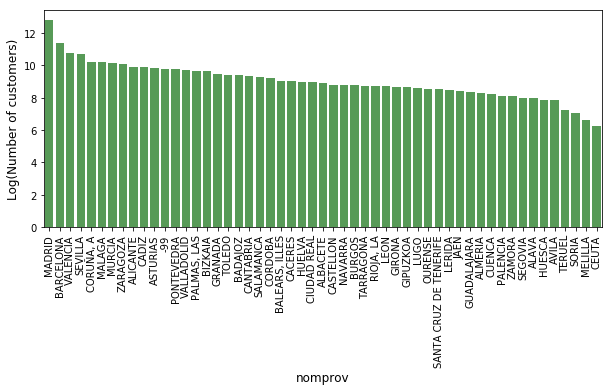


Number of missing values in  ind_actividad_cliente  :  10782
Number of unique values in  ind_actividad_cliente  :  3
Float64Index([1.0, 0.0, -99.0], dtype='float64')


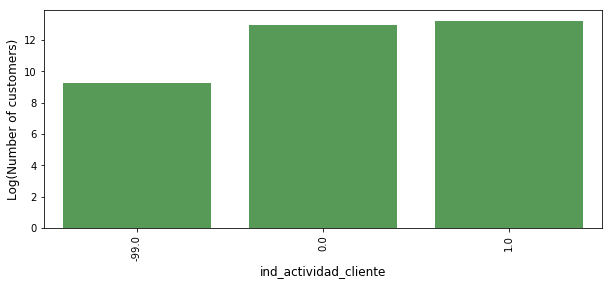


Number of missing values in  segmento  :  10895
Number of unique values in  segmento  :  4
Index(['02 - PARTICULARES', '03 - UNIVERSITARIO', '01 - TOP', -99], dtype='object')


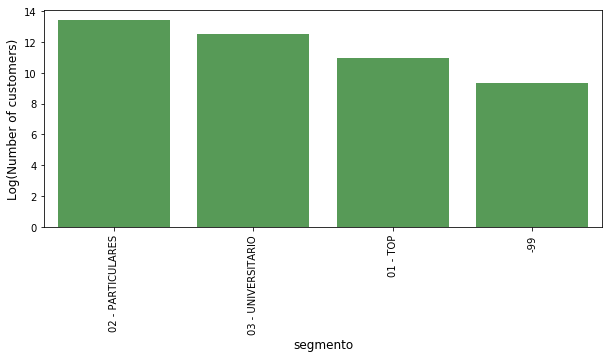

In [101]:
cols = ["ind_empleado","pais_residencia","sexo","ind_nuevo","indrel","ult_fec_cli_1t","indrel_1mes","tiprel_1mes","indresi","indext","conyuemp","canal_entrada","indfall","tipodom","cod_prov","nomprov","ind_actividad_cliente","segmento"]
for col in cols:
    train = pd.read_csv(train_data, usecols = ["ncodpers", col], nrows=1000000)
    print("Number of missing values in ",col," : ",train[col].isnull().sum())    
    train = train.fillna(-99)
    len_unique = len(train[col].unique())
    print("Number of unique values in ",col," : ",len_unique)
    print("===============================")
    #if len_unique < 200:
    df = train[col].value_counts()
    print (df.index)
    plt.figure(figsize=(10,4))
    sns.barplot(df.index, np.log1p(df.values), alpha=0.7, color='green')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Log(Number of customers)', fontsize=12)
    plt.xticks(rotation='vertical')
    plt.show()
    print()

# Age

In [150]:
train = pd.read_csv(train_data,usecols=['age'])

/Users/nargispauran/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [103]:
train['age'] = pd.to_numeric(train['age'], errors="coerce")

In [105]:
print("Number of missing values in ",col," : ",train['age'].isnull().sum())    

Number of missing values in  segmento  :  27734


This is same as the number of missing values for fetcha_alta

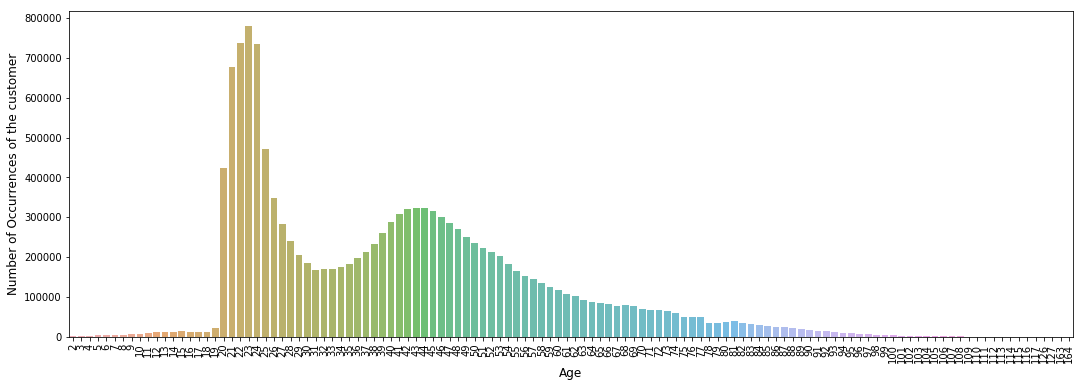

In [149]:
train['age'] = train['age'].replace(to_replace=[' NA'], value=np.nan)
train['age'] = train['age'].astype('float64')
age = train.age.value_counts()
sns.barplot(age.index.astype('int'), age.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [141]:
print("Mean age of customers : ", train.age.mean())
print("Minimum age of customers: ", train.age.min())
print("Maximum age of customers: ", train.age.max())


Mean age of customers :  40.18146491355274
Minimum age of customers:  2.0
Maximum age of customers:  164.0


Findings

 - Bimodal distribution is observed for age 
 - There are records of very young customers and also for customers older than 100 
 - There are 27734 missing values and the mean age of customers is 40

# Product Columns

In [3]:
train = pd.read_csv(train_data, dtype='float16', 
                    usecols=['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 
                             'ind_cco_fin_ult1', 'ind_cder_fin_ult1',
                             'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
                             'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1',
                             'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                             'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
                             'ind_ecue_fin_ult1', 'ind_fond_fin_ult1',
                             'ind_hip_fin_ult1', 'ind_plan_fin_ult1',
                             'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
                             'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1',
                             'ind_viv_fin_ult1', 'ind_nomina_ult1',
                             'ind_nom_pens_ult1', 'ind_recibo_ult1'])

In [4]:
target_counts = train.astype('float64').sum(axis=0)

In [5]:
target_counts

ind_ahor_fin_ult1       1396.0
ind_aval_fin_ult1        316.0
ind_cco_fin_ult1     8945588.0
ind_cder_fin_ult1       5376.0
ind_cno_fin_ult1     1103620.0
ind_ctju_fin_ult1     129297.0
ind_ctma_fin_ult1     132742.0
ind_ctop_fin_ult1    1760616.0
ind_ctpp_fin_ult1     591008.0
ind_deco_fin_ult1      24275.0
ind_deme_fin_ult1      22668.0
ind_dela_fin_ult1     586381.0
ind_ecue_fin_ult1    1129227.0
ind_fond_fin_ult1     252284.0
ind_hip_fin_ult1       80336.0
ind_plan_fin_ult1     125159.0
ind_pres_fin_ult1      35857.0
ind_reca_fin_ult1     716980.0
ind_tjcr_fin_ult1     605786.0
ind_valo_fin_ult1     349475.0
ind_viv_fin_ult1       52511.0
ind_nomina_ult1       745961.0
ind_nom_pens_ult1     810085.0
ind_recibo_ult1      1745712.0
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

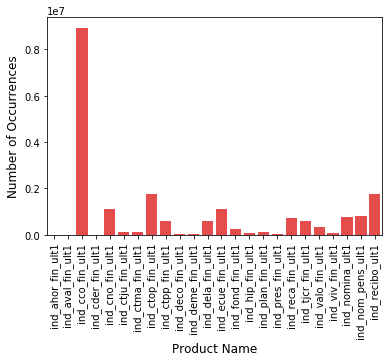

In [6]:
sns.barplot(target_counts.index, target_counts.values, alpha=0.8, color='red')
plt.xlabel('Product Name', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation='vertical')

In [17]:
print("Number of nulls in ind_nomina_ult1 : ", train['ind_nomina_ult1'].isnull().sum())
print("Number of nulls in ind_nom_pens_ult1 : ", train['ind_nom_pens_ult1'].isnull().sum())

Number of nulls in ind_nomina_ult1 :  16063
Number of nulls in ind_nomina_ult1 :  16063
Number of nulls in ind_nom_pens_ult1 :  16063
Number of nulls in ind_nom_pens_ult1 :  16063


Findings:

- The most and least popular products are: Current Accounts and Guarantees
- Payroll and Pension indecator columns contain 16063 empty cells in each


# antiguedad

In [ ]:
train = pd.read_csv(train_data, usecols=['antiguedad'])

In [ ]:
train["antiguedad"] = pd.to_numeric(train["antiguedad"],errors="coerce")

In [ ]:
train.antiguedad.isnull().sum()

In [ ]:
(train['antiguedad'] == -999999.0).sum()

In [ ]:
col_series = train.antiguedad.value_counts()
plt.figure(figsize=(12,4))
sns.barplot(col_series.index.astype('int'), col_series.values, alpha=0.8)
plt.ylabel('Number of Occurrences of the customer', fontsize=12)
plt.xlabel('Customer Seniority', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

# RENTA - Gross income of the household

In [7]:
train = pd.read_csv(train_data, usecols=['renta',"nomprov"])
train.head()

,nomprov,renta
0,MALAGA,87218.10
1,CIUDAD REAL,35548.74
2,CIUDAD REAL,122179.11
3,ZARAGOZA,119775.54
4,ZARAGOZA,NaN


In [8]:
train.renta.isnull().sum()

2794375

In [9]:
train.renta.mean()

134254.3182380867

In [10]:
train.renta.median()

101850.0

In [11]:
train["nomprov"].isnull().sum()

93591

In [12]:
train.loc[train.nomprov.isnull(),"nomprov"] = "UNKNOWN"

In [13]:
train.loc[train.nomprov=="CORU\xc3\x91A, A","nomprov"] = "CORUNA, A"

In [14]:
incomes = train.loc[train.renta.notnull(),:].groupby("nomprov").agg({"renta":{"MedianIncome":median}})
incomes.sort_values(by=("renta","MedianIncome"),inplace=True)
incomes.reset_index(inplace=True)
incomes.nomprov = incomes.nomprov.astype("category", categories=[i for i in train.nomprov.unique()],ordered=False)
incomes.head()

/anaconda3/lib/python3.6/site-packages/pandas/core/groupby/groupby.py:4658: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  after removing the cwd from sys.path.


,nomprov,renta
,,MedianIncome
0,CIUDAD REAL,62193.45
1,BADAJOZ,62330.97
2,LUGO,64390.53
3,LERIDA,64818.45
4,CASTELLON,66630.30


([<matplotlib.axis.YTick at 0x1116633c8>,
 <a list of 5 Text yticklabel objects>)

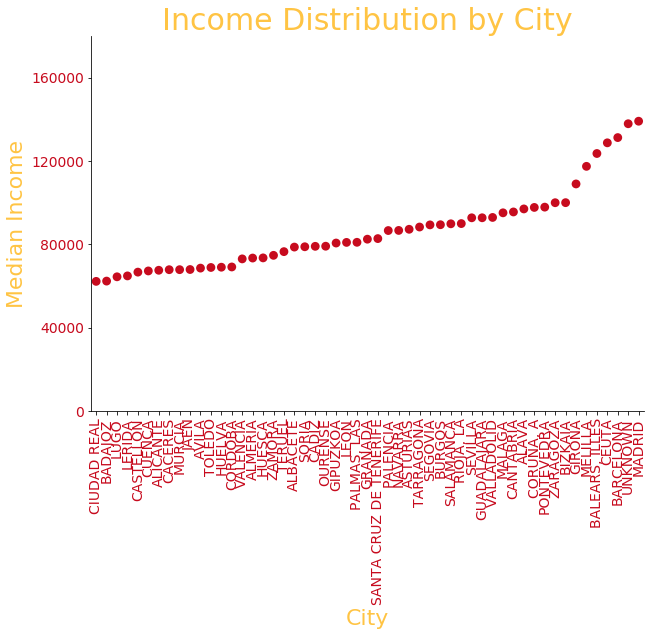

In [15]:
with sns.axes_style({
        "axes.grid"     :    False}):
    h = sns.factorplot(data=incomes,
                   x="nomprov",
                   y=("renta","MedianIncome"),
                   order=(i for i in incomes.nomprov),
                   size=6,
                   aspect=1.5,
                   scale=1.0,
                   color="#c70b1e",
                   linestyles="None")
plt.xticks(rotation=90)
plt.tick_params(labelsize=14,labelcolor="#c70b1e")#
plt.ylabel("Median Income",size=22,color="#ffc444")
plt.xlabel("City",size=22,color="#ffc444")
plt.title("Income Distribution by City",size=30,color="#ffc444")
plt.ylim(0,180000)
plt.yticks(range(0,180000,40000))

Finding

There is a lot of variation in the meadian household income across the regions